# Data will be there for you like it's been there before

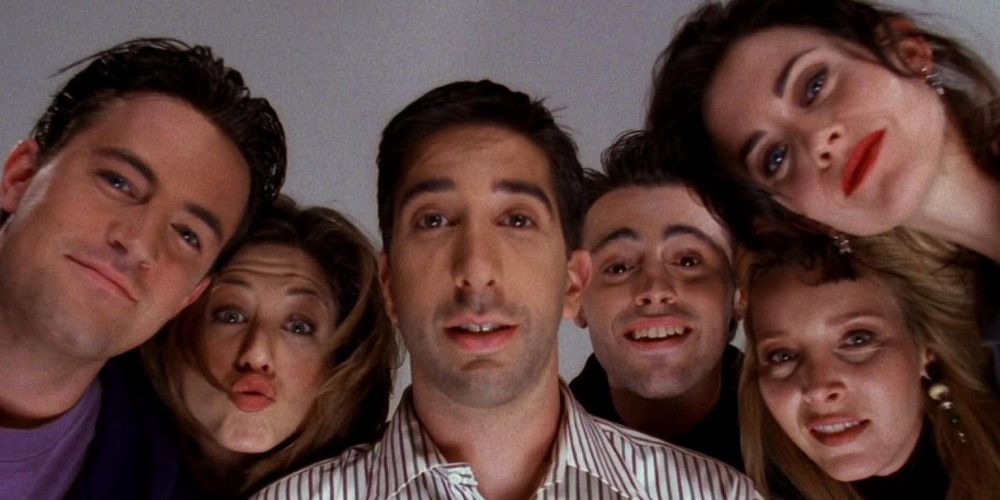

### Introduction

In this project I Analyse the [Friends Episode Dataset](https://www.kaggle.com/bcruise/friends-episode-data), which contains the episode wise IMDB rating and US viewership data of this American TV Show - 'Friends', using the CRISP-DM Process to gain some useful insights.
The CRISP-DM Process entails the following steps:

1.Business Understanding

2.Data Understanding

3.Prepare Data

4.Data Modeling

5.Evaluate the Results

6.Deploy

Now, let's go through these steps one by one.

### Business Understanding:

'Friends' is known to be one of the best sitcoms ever to be created. While some people try to convince that the show is overrated, overwhelming evidence suggests that the show is worth it's every good rating. I decided that it's time I analysed the show's episode data and provided the world with proper statistics, so as to validate the huge fan base that the show claims to have. I want to explore the different components that contributed to the show's huge success. We'll explore the following questions in this project.

- Which season is considered to be the best-liked?


- Which character was given the most importance in the show?


- Which character has the highest rating and viewership per episode?


- Which director captured a wider fan base?


- Which writer contributed the most to fan-favourite episodes?




### Data Understanding and Preparation

#### Loading the data

In [152]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import defaultdict

In [153]:
# read the dataset
df = pd.read_csv('friends_episodes.csv')

In [154]:
# a look at the dataset
df.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0


In [155]:
# read the ratings dataset
df_1 =pd.read_csv('friends_imdb.csv',usecols=['title','imdb_rating','desc'])
df_1.head()

,title,imdb_rating,desc
0,The One Where Monica Gets a Roommate,8.3,"Monica and the gang introduce Rachel to the ""r..."
1,The One with the Sonogram at the End,8.0,Ross finds out his ex-wife is pregnant. Rachel...
2,The One with the Thumb,8.1,Monica becomes irritated when everyone likes h...
3,The One with George Stephanopoulos,8.1,Joey and Chandler take Ross to a hockey game t...
4,The One with the East German Laundry Detergent,8.4,"Eager to spend time with Rachel, Ross pretends..."


In [156]:
# let's merge both the datasets in a manner to add the IMDB Rating  data for each episode
df = df_1.merge(df,left_on='title',right_on='title',how='inner')
df=df.sort_values(by='imdb_rating', ascending=False)

df.head()

,title,imdb_rating,desc,season,episode_num_in_season,episode_num_overall,directed_by,written_by,original_air_date,prod_code,us_viewers
235,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,18,236,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0
234,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,17,235,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0
110,The One Where Everybody Finds Out,9.7,When Phoebe finds out about Monica and Chandle...,5,14,111,Michael Lembeck,Alexa Junge,1999-02-11,467664,27700000.0
84,The One with the Embryos,9.5,Phoebe's uterus is examined for implantation o...,4,12,85,Kevin S. Bright,Jill Condon & Amy Toomin,1998-01-15,466611,27140000.0
37,The One with the Prom Video,9.4,The gang watches a home video from the night o...,2,14,38,James Burrows,Alexa Junge,1996-02-01,457310,33600000.0


#### What information does the columns give

Let's now see what each column represent.


1) title - It gives the title of the episode

2) imdb_rating - It gives the IMDB Rating of the episode

3) season - It gives the season number in which the episode belong

4) episode_num_in_season - It gives the episode number according to the particular season

5) episode_num_overall - It gives the episode number in the entire show

6) directed_by - It gives the director name of that episode

7) written_by - It gives the writer name of that episode

8) original_air_date - It gives the date when the episode was first aired

9) prod_code - It gives the production code of that episode

10) us_viewers - It gives the total number of US viewers for that episode

In [157]:
# Drop the duplicate rows if any
df.drop_duplicates()

,title,imdb_rating,desc,season,episode_num_in_season,episode_num_overall,directed_by,written_by,original_air_date,prod_code,us_viewers
235,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,18,236,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0
234,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,17,235,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0
110,The One Where Everybody Finds Out,9.7,When Phoebe finds out about Monica and Chandle...,5,14,111,Michael Lembeck,Alexa Junge,1999-02-11,467664,27700000.0
84,The One with the Embryos,9.5,Phoebe's uterus is examined for implantation o...,4,12,85,Kevin S. Bright,Jill Condon & Amy Toomin,1998-01-15,466611,27140000.0
37,The One with the Prom Video,9.4,The gang watches a home video from the night o...,2,14,38,James Burrows,Alexa Junge,1996-02-01,457310,33600000.0
...,...,...,...,...,...,...,...,...,...,...,...
188,The One with Joey's Interview,7.4,Joey prepares for his epic interview with Soap...,8,19,189,Gary Halvorson,Doty Abrams,2002-04-04,227424,22590000.0
203,The One with Christmas in Tulsa,7.4,"Chandler must spend Christmas in Tulsa, which ...",9,10,204,Kevin S. Bright,Doty Abrams,2002-12-12,175260,22280000.0
166,The One with the Vows,7.4,Monica and Chandler are getting married in fou...,7,21,167,Gary Halvorson,Doty Abrams,2001-05-03,226424,15650000.0
140,The One with Mac and C.H.E.E.S.E.,7.3,Chandler forgets to write down a message for J...,6,20,141,Kevin S. Bright,Doty Abrams,2000-04-13,225575,18810000.0


In [158]:
# delve a bit deeper into understanding the dataset's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 235 to 93
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  236 non-null    object 
 1   imdb_rating            236 non-null    float64
 2   desc                   236 non-null    object 
 3   season                 236 non-null    int64  
 4   episode_num_in_season  236 non-null    int64  
 5   episode_num_overall    236 non-null    int64  
 6   directed_by            236 non-null    object 
 7   written_by             236 non-null    object 
 8   original_air_date      236 non-null    object 
 9   prod_code              236 non-null    object 
 10  us_viewers             236 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 22.1+ KB


In [159]:
# To see number of null values in each column
df.isnull().sum()

title                    0
imdb_rating              0
desc                     0
season                   0
episode_num_in_season    0
episode_num_overall      0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               0
dtype: int64

Well, it was lucky for me to land on a dataset with zero null values.

In [160]:
# describe the numerical features with their central tendencies
df.describe()

,imdb_rating,season,episode_num_in_season,episode_num_overall,us_viewers
count,236.000000,236.000000,236.000000,236.000000,2.360000e+02
mean,8.427966,5.377119,12.377119,118.500000,2.539081e+07
std,0.417670,2.814428,6.936010,68.271517,5.211109e+06
min,7.100000,1.000000,1.000000,1.000000,1.565000e+07
25%,8.100000,3.000000,6.000000,59.750000,2.236000e+07
50%,8.400000,5.000000,12.000000,118.500000,2.449500e+07
75%,8.700000,8.000000,18.000000,177.250000,2.771000e+07
max,9.700000,10.000000,25.000000,236.000000,5.290000e+07


We can infer the following from above:

- The highest IMDB rating recieved was 9.7 while the minimum was 7.1


- In total, there are 10 Seasons.


- The longest season contains 25 episodes.


- In total, there are 236 episodes.


- The number of US viewers range from 1.565e+07 to 5.29e+07.

### Exploratory Data Analysis

In [161]:
# convert the imdb_rating columns values into 'float' type
df['imdb_rating'] = df['imdb_rating'].astype('float')

In [162]:
# 
rating_values = df['imdb_rating'].value_counts()
rating_values

8.2    34
8.5    28
8.1    28
8.3    21
8.6    19
8.0    16
8.7    15
8.4    13
9.1    10
8.9     9
9.0     8
8.8     8
7.9     6
7.8     5
7.4     3
9.7     3
9.2     3
9.3     3
9.5     1
9.4     1
7.3     1
7.1     1
Name: imdb_rating, dtype: int64

Text(0, 0.5, 'No. of Episode')

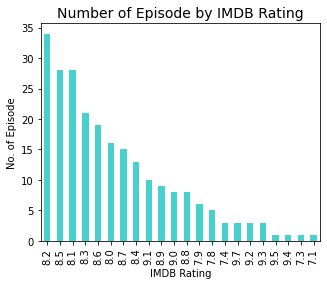

In [163]:
plt.figure(figsize=(5,4))
rating_values.plot(kind='bar', color = 'mediumturquoise')
plt.title('Number of Episode by IMDB Rating',fontsize = 14)
plt.xlabel('IMDB Rating')
plt.ylabel('No. of Episode')


As we can see most of the episodes has a rating of 8.2. Majority of the episodes had the IMDB rating lying in the range of 8.0 to 9.0. This tells a lot about the consistent quality of the show.

In [164]:
view_values = df['us_viewers'].value_counts()
view_values

25900000.0    3
23220000.0    3
26100000.0    3
30200000.0    3
26760000.0    3
             ..
29240000.0    1
23260000.0    1
27250000.0    1
21070000.0    1
21510000.0    1
Name: us_viewers, Length: 206, dtype: int64

Histogram:

<Figure size 1080x1080 with 0 Axes>

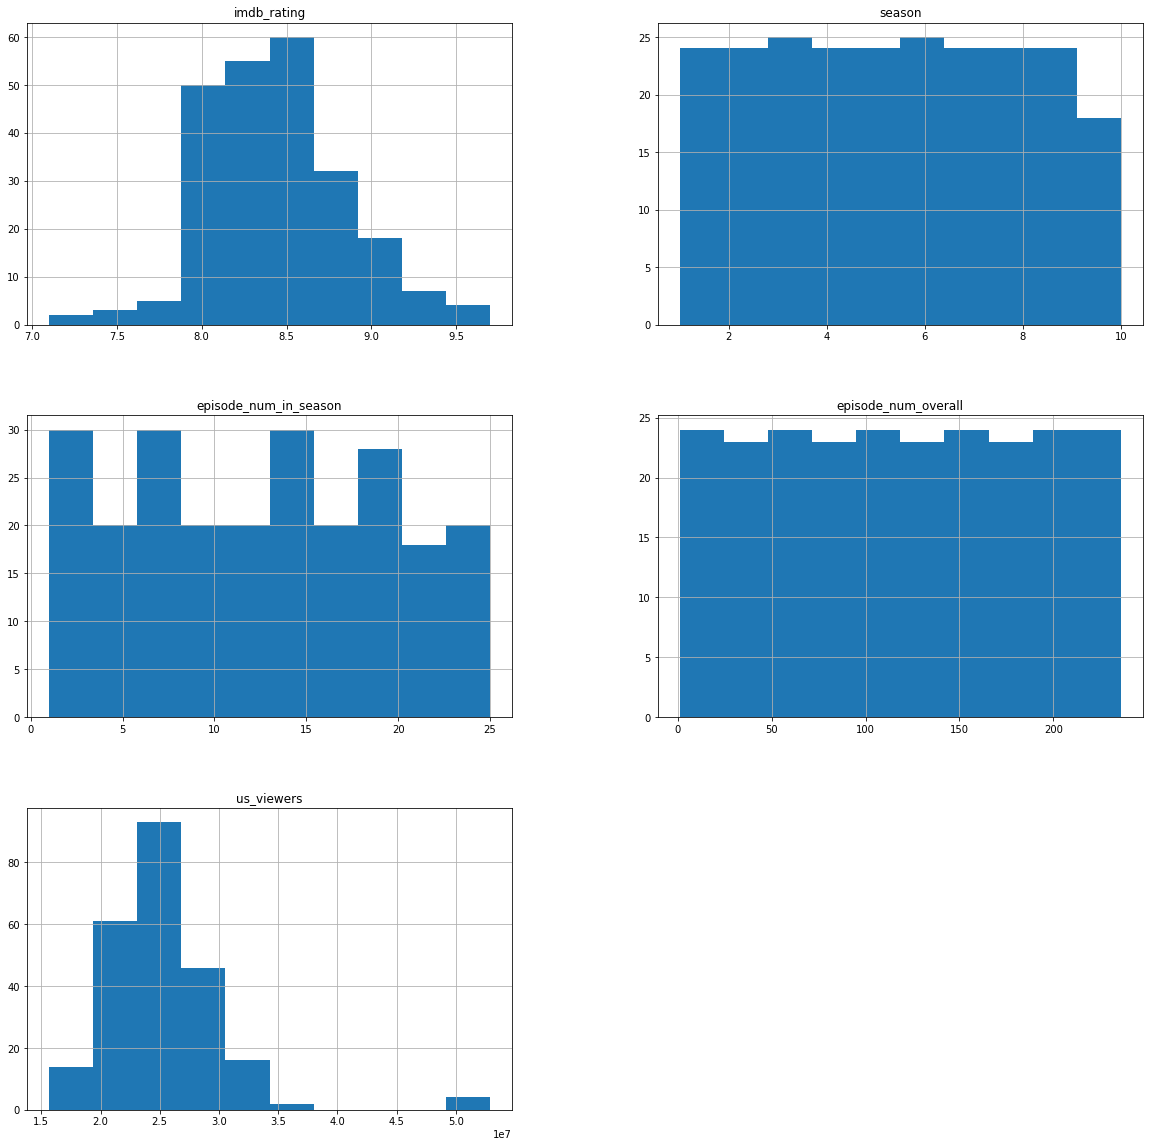

In [165]:
plt.figure(figsize = (15,15))
fig = df.hist(figsize = (20,20))

Pair Plots:

C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\msmka\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data

<Figure size 360x360 with 0 Axes>

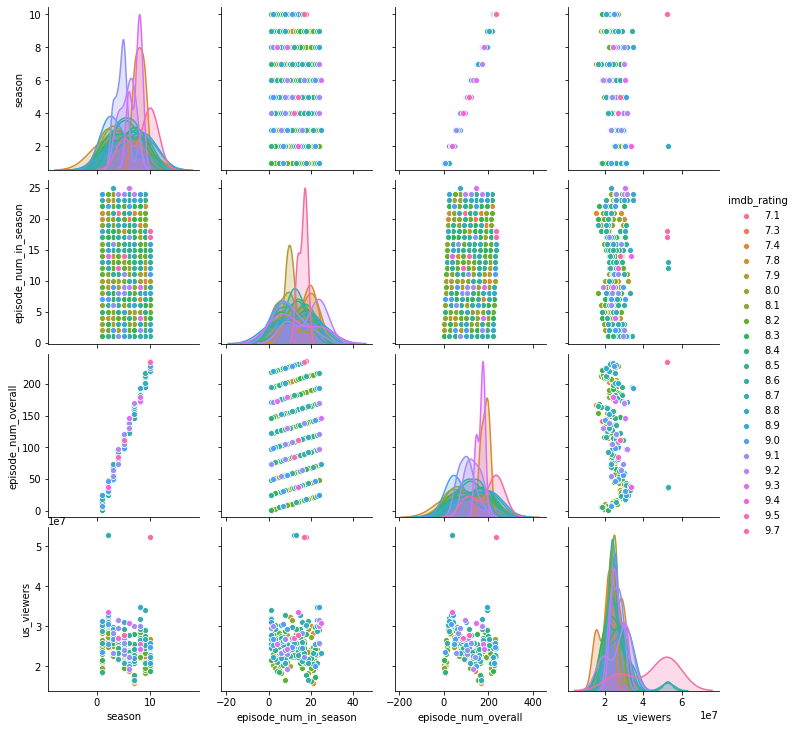

In [166]:
plt.figure(figsize = (5,5))
fig =sns.pairplot(df, hue = 'imdb_rating')

Heat Map:

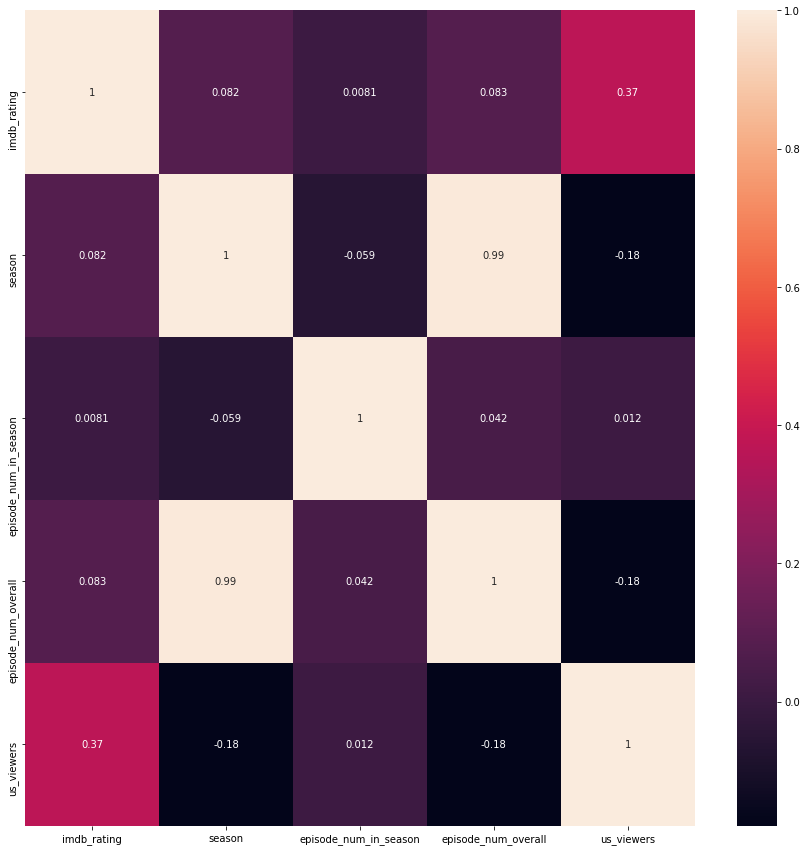

In [167]:
plt.figure(figsize = (15,15))
fig =sns.heatmap(df.corr(), annot=True)

As we can infer from the above analysis, imdb_rating and us_viewers have the highest correlation. It's obviouse because IMDB Rating tells us how much the fans has enjoyed it and it indirectly implies amount of viewers. So, apart from the above inference, episode number in season seems to influence the viewers a bit and same applies for overall episode number and IMDB rating.

<AxesSubplot:>

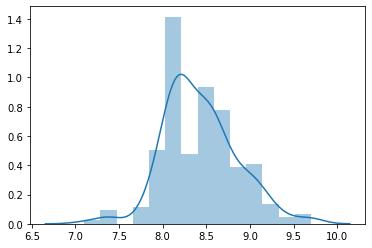

In [168]:
sns.distplot(df['imdb_rating'].values)

<AxesSubplot:>

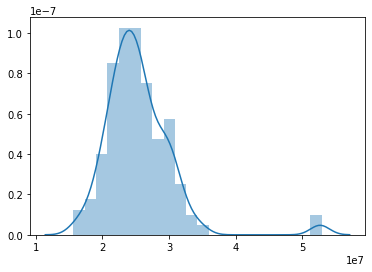

In [169]:
sns.distplot(df['us_viewers'].values)

### Analyse and Visualise

#### 1) Which season can be considered the best-liked?

In [170]:
# obtain value counts of each season
season_values = df['season'].value_counts()
season_values

6     25
3     25
5     24
4     24
2     24
8     24
7     24
1     24
9     24
10    18
Name: season, dtype: int64

In [171]:
# group numerical variables by season
df.groupby('imdb_rating')['season'].describe()

,count,mean,std,min,25%,50%,75%,max
imdb_rating,,,,,,,,
7.1,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
7.3,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0
7.4,3.0,8.000000,1.000000,7.0,7.50,8.0,8.50,9.0
7.8,5.0,4.400000,3.847077,1.0,1.00,3.0,8.00,9.0
7.9,6.0,5.166667,3.188521,2.0,2.50,4.5,8.00,9.0
8.0,16.0,4.687500,2.821790,1.0,2.75,4.0,7.25,10.0
8.1,28.0,4.571429,2.949307,1.0,2.00,4.0,7.00,9.0
8.2,34.0,5.176471,2.989584,1.0,3.00,5.0,8.00,10.0
8.3,21.0,5.714286,2.917925,1.0,3.00,6.0,8.00,10.0


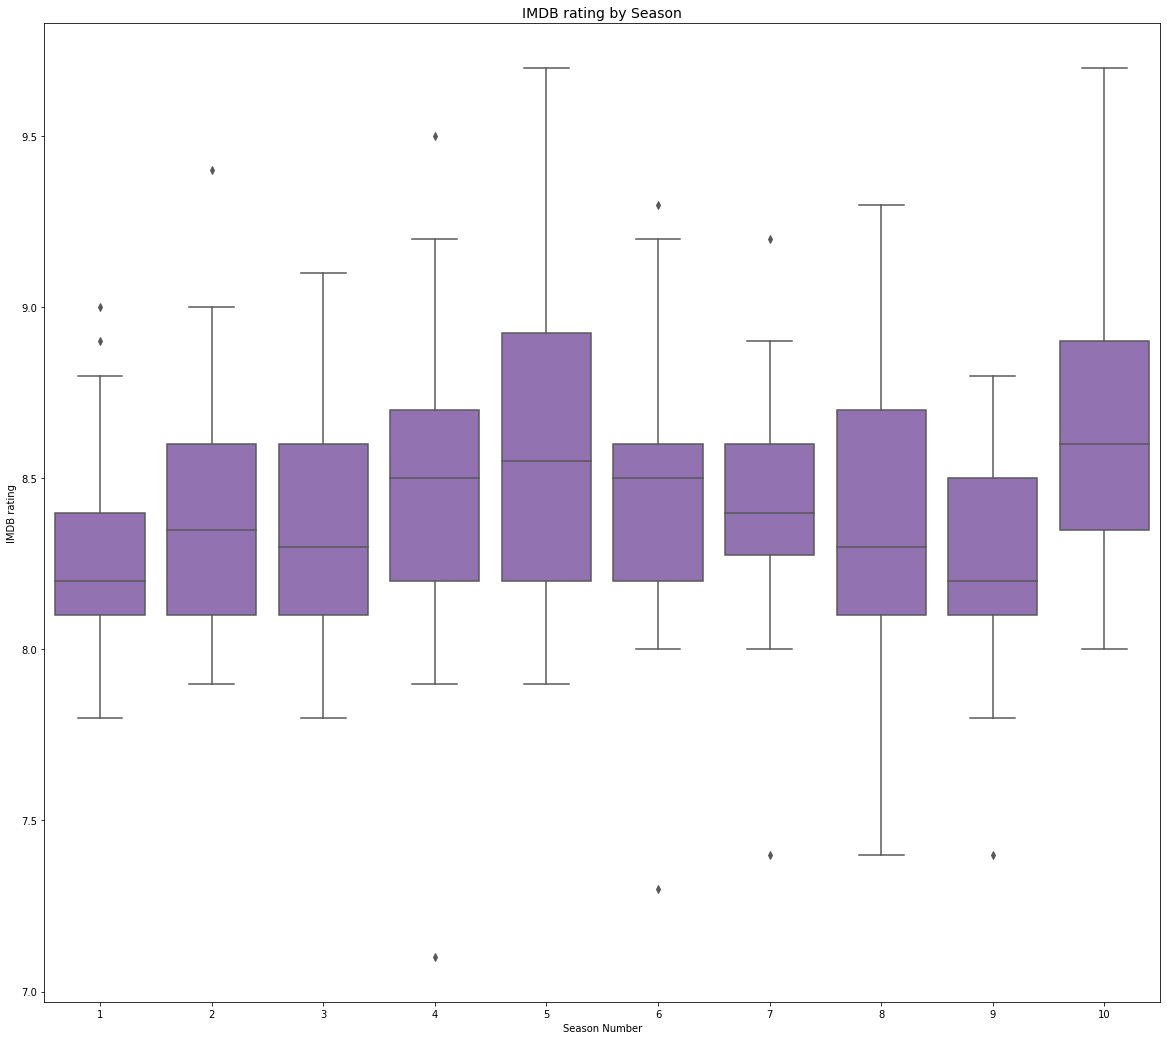

In [172]:
# Box Plot 
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df, y = 'imdb_rating', x = 'season', color = base_color)
plt.title('IMDB rating by Season', fontsize = 14)
plt.ylabel('IMDB rating')
plt.xlabel('Season Number');

Text(0.5, 1.0, 'IMDb Ratings for Friends episodes')

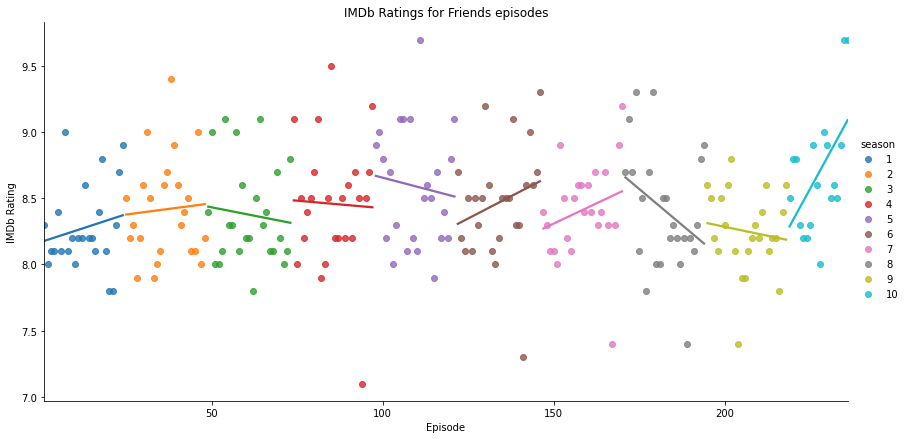

In [173]:
sns.lmplot(x="episode_num_overall", y="imdb_rating", hue="season", data=df, height=6, aspect=2, ci=None)
plt.xlabel("Episode")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings for Friends episodes")

Though there are mild variance, it is safe to conclude that all the seasons were pretty much consistent!

In [174]:
df1 = df.drop(['episode_num_in_season','episode_num_overall'],axis = 1)
df1 = df1.groupby('season').agg('mean')# group numerical variable by season

# create df with 10 seasons with highest average rating
df1 = df1.sort_values(by='imdb_rating', ascending=False)[:10]
df1.head()

,imdb_rating,us_viewers
season,,
10,8.688889,2.612667e+07
5,8.591667,2.474750e+07
6,8.468000,2.304520e+07
4,8.458333,2.494792e+07
2,8.416667,3.172083e+07


In [175]:
x_vals = df1.index.to_series() #convert it to pandas series
y_vals = df1['imdb_rating']
y_vals

season
10    8.688889
5     8.591667
6     8.468000
4     8.458333
2     8.416667
7     8.412500
8     8.408333
3     8.376000
1     8.275000
9     8.250000
Name: imdb_rating, dtype: float64

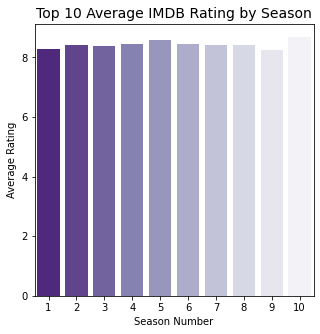

In [176]:
# bar plot for average rating by season
plt.figure(figsize=(5,5))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average IMDB Rating by Season', fontsize = 14)
plt.ylabel('Average Rating')
plt.xlabel('Season Number');

Thus, season 10 has the highest average IMDB rating followed by the seasons : 5,6,4,2 which are in the top 5.

In [177]:

# create df with 10 seasons with highest average viewership
df1 = df1.sort_values(by='us_viewers', ascending=False)[:10]
df1.head()

,imdb_rating,us_viewers
season,,
2,8.416667,3.172083e+07
8,8.408333,2.672000e+07
10,8.688889,2.612667e+07
3,8.376000,2.608120e+07
4,8.458333,2.494792e+07


In [178]:
x_vals = df1.index.to_series()#convert it to pandas series
y_vals = df1['us_viewers']
y_vals

season
2     3.172083e+07
8     2.672000e+07
10    2.612667e+07
3     2.608120e+07
4     2.494792e+07
1     2.479167e+07
5     2.474750e+07
9     2.392833e+07
6     2.304520e+07
7     2.205167e+07
Name: us_viewers, dtype: float64

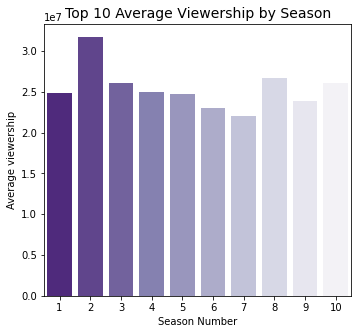

In [179]:
# bar plot for average rating by season
plt.figure(figsize=(5.5,5))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average Viewership by Season', fontsize = 14)
plt.ylabel('Average viewership')
plt.xlabel('Season Number');

Unlike the IMDB rating trend, season 2 has the most average viewership. 
Season 10 which had highest average rating now takes the 3rd place in viewership.

#### Which character was given the most importance in the show?

We can understand a character's importance in any episode by seeing if they appear in the episode description. There are totally 5 characters:
- Monica Geller
- Rachel Greene
- Phoebe Buffay
- Joey Tribbiani
- Chandler Bing
- Ross Geller

Now we'll analyse the character's importance overall and contribution to highly rated episodes by analysing each episode's description.

In [180]:
characters = ['Monica', 'Rachel', 'Phoebe', 'Ross', 'Joey', 'Chandler']

char = ['' for i in range(df.shape[0])]
# Create columns for the character to denote their importance in each episode
for i in range(df.shape[0]):
    for character in characters:
        if character in df['desc'][i]:
            char[i]+=character 
            char[i]+=', '
df['characters'] = pd.Series(char)
    


# Print first 5 rows to make sure we got what we wanted
df.head()

,title,imdb_rating,desc,season,episode_num_in_season,episode_num_overall,directed_by,written_by,original_air_date,prod_code,us_viewers,characters
235,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,18,236,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
234,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,17,235,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
110,The One Where Everybody Finds Out,9.7,When Phoebe finds out about Monica and Chandle...,5,14,111,Michael Lembeck,Alexa Junge,1999-02-11,467664,27700000.0,"Monica, Rachel, Phoebe, Chandler,"
84,The One with the Embryos,9.5,Phoebe's uterus is examined for implantation o...,4,12,85,Kevin S. Bright,Jill Condon & Amy Toomin,1998-01-15,466611,27140000.0,"Monica, Rachel, Phoebe, Joey, Chandler,"
37,The One with the Prom Video,9.4,The gang watches a home video from the night o...,2,14,38,James Burrows,Alexa Junge,1996-02-01,457310,33600000.0,"Monica, Rachel, Joey, Chandler,"


In [181]:
''' The function below takes a data frame and return a new data frame where the row represents the elements of the val_list
    in the same order. Each entry corresponding to it will be sum of values in col2 for each value in col1'''
def unique_count_sum(df,col1,col2,val_list):
    df1 = defaultdict(int)
    for val in val_list:
        for i in range(df.shape[0]):
            if val in df[col1][i]:
                df1[val]+= int(df[col2][i])
    df1 = pd.DataFrame(pd.Series(df1)).reset_index()
    df1.columns = [col1, col2]
    df1.sort_values(col2, ascending=False, inplace=True)
    return df1

''' Just as how the function above counts the sum of each character's appearance, the function below calculates the 
    average of the value present in col2 foe each valuein col1'''

def unique_count_mean(df,col1,col2,val_list):
    df1 = defaultdict(list)
    for val in val_list:
        for i in range(df.shape[0]):
            if val in df[col1][i]:
                df1[val].append(int(df[col2][i]))
    for k,v in df1.items():
        df1[k] = sum(v)/len(v)
    df1 = pd.DataFrame(pd.Series(df1)).reset_index()
    df1.columns = [col1, col2]
    df1.sort_values(col2, ascending=False, inplace=True)
    return df1

In [182]:
# obtain value counts of each character
character = df['characters'].value_counts().reset_index()
character.rename(columns={'index': 'characters', 'characters': 'count'}, inplace=True)
character

,characters,count
0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,",30
1,"Monica, Rachel, Ross, Joey, Chandler,",17
2,"Monica, Rachel, Phoebe, Joey, Chandler,",16
3,"Monica, Rachel, Phoebe, Ross, Chandler,",12
4,"Monica, Rachel, Phoebe, Ross, Joey,",9
5,"Monica, Rachel, Ross, Chandler,",8
6,"Monica, Chandler,",7
7,"Rachel, Phoebe, Ross,",7
8,"Rachel, Phoebe, Ross, Joey,",7
9,"Monica, Rachel, Phoebe, Chandler,",6


In [183]:
''' The column characters contain multiple character names in a single entry. While analysing character by 
    character, we will need a data frame of different structure where each character has its own values seperately.
    Each value will represent the totalnumber of episodes in which each character name was present in the description 
    The function below implements the above stated changes and returns a new dataframe - character_df'''
character_df =unique_count_sum(character, 'characters', 'count',characters)
character_df.reset_index()
character_df.head()

,characters,count
1,Rachel,171
0,Monica,160
5,Chandler,156
3,Ross,155
4,Joey,141


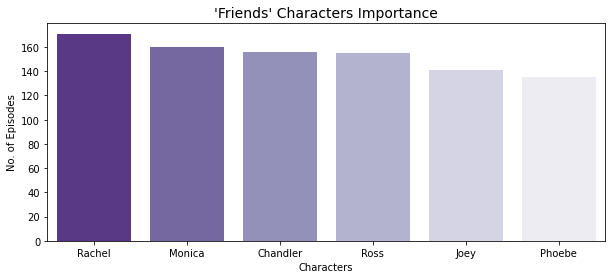

In [184]:
# bar plot to visualise each character's importance
plt.figure(figsize=(10,4))
sns.barplot(x=character_df['characters'], y=character_df['count'], palette='Purples_r')
plt.title('\'Friends\' Characters Importance', fontsize = 14)
plt.xlabel('Characters')
plt.ylabel('No. of Episodes');

Thus we can see that Rachel has appeared in most of the description and hence is considered to have most importance. Phoebe character comes in last in this overall analysis

Out of curiosity I'm trying to figure out in how many episodes were both Chandler and Monica had peak couple roles.

In [185]:
# search for the episodes whose desription has the phrade 'Monica and Chandler'
mondler = df[df['desc'].str.contains('Monica and Chandler')]
mondler

,title,imdb_rating,desc,season,episode_num_in_season,episode_num_overall,directed_by,written_by,original_air_date,prod_code,us_viewers,characters
235,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,18,236,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
234,The Last One,9.7,Phoebe races Ross to the airport in a bid to s...,10,17,235,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
110,The One Where Everybody Finds Out,9.7,When Phoebe finds out about Monica and Chandle...,5,14,111,Michael Lembeck,Alexa Junge,1999-02-11,467664,27700000.0,"Monica, Rachel, Phoebe, Chandler,"
96,The One with Ross's Wedding: Part 2,9.2,Phoebe tries to warn the gang that Rachel is c...,4,24,97,Kevin S. Bright,Story by: Jill Condon & Amy Toomin Teleplay by...,1998-05-07,466624,31610000.0,"Monica, Rachel, Phoebe, Ross, Chandler,"
225,The One with the Late Thanksgiving,8.9,"Joey, Ross, Rachel and Phoebe convince Monica ...",10,8,226,Gary Halvorson,Shana Goldberg-Meehan,2003-11-20,176259,20660000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
172,The One Where Rachel Tells...,8.7,"Even on their honeymoon, Monica is pushy, and ...",8,3,173,Sheldon Epps,Sherry Bilsing & Ellen Plummer,2001-10-11,227403,29200000.0,"Monica, Phoebe, Joey, Chandler,"
121,The One After Vegas,8.7,Ross and Rachel deal with the aftermath of the...,6,1,122,Kevin S. Bright,Adam Chase,1999-09-23,225551,27740000.0,"Monica, Rachel, Phoebe, Ross, Joey, Chandler,"
226,The One with the Birth Mother,8.6,"Nervous and excited, Monica and Chandler trave...",10,9,227,David Schwimmer,Scott Silveri,2004-01-08,176258,25480000.0,"Monica, Chandler,"
231,The One with Princess Consuela,8.6,When Phoebe goes to get her name changed she r...,10,14,232,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0,"Monica, Rachel, Phoebe, Joey, Chandler,"
141,The One Where Ross Meets Elizabeth's Dad,8.6,Elizabeth's father takes an instant disliking ...,6,21,142,Michael Lembeck,Story by: David J. LaganaTeleplay by: Scott Si...,2000-04-27,225570,20630000.0,"Monica, Phoebe, Ross, Joey, Chandler,"


In [186]:
mondler.shape[0]

27

#### Which character has the highest rating and viewership per episode?

In [187]:

df2 = df.groupby('characters').agg('mean')# group numerical variables by characters

# create df with 10 characters with highest average rating
df2 = df2.sort_values(by='imdb_rating', ascending=False)[:10]
df2 = df2.reset_index()
df2.head()


,characters,imdb_rating,season,episode_num_in_season,episode_num_overall,us_viewers
0,"Ross,",9.000000,6.000000,22.00,143.000000,2.001000e+07
1,"Rachel,",8.833333,6.166667,17.00,142.333333,2.741333e+07
2,,8.760000,5.400000,11.40,118.000000,2.436600e+07
3,"Rachel, Joey, Chandler,",8.700000,8.000000,1.00,171.000000,3.170000e+07
4,"Rachel, Ross, Chandler,",8.675000,5.250000,13.25,116.500000,2.386500e+07


In [188]:

character_df1 =unique_count_mean(df2, 'characters', 'imdb_rating',characters)
character_df1.set_index('characters', inplace=True)
character_df1 = character_df1.reset_index()
character_df1.head()# The column imdb_rating contains the mean rating for each character

,characters,imdb_rating
0,Ross,8.2
1,Monica,8.0
2,Rachel,8.0
3,Phoebe,8.0
4,Joey,8.0


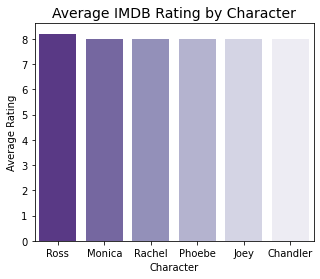

In [189]:
# bar plot for average rating by character
plt.figure(figsize=(5,4))
sns.barplot(x=character_df1['characters'], y=character_df1['imdb_rating'], palette='Purples_r')
plt.title('Average IMDB Rating by Character', fontsize = 14)
plt.ylabel('Average Rating')
plt.xlabel('Character');

The character ross has the highest average IMDB rating of 8.2 whereas all others have the same average rating of 8.

In [139]:
character_df2 =unique_count_mean(df2, 'characters', 'us_viewers',characters)
character_df2.set_index('characters', inplace=True)
character_df2 = character_df2.reset_index()
character_df2.head()# The column imdb_rating contains the mean viewership for each character


,characters,us_viewers
0,Joey,2.824917e+07
1,Rachel,2.706440e+07
2,Chandler,2.700625e+07
3,Monica,2.670250e+07
4,Phoebe,2.583708e+07


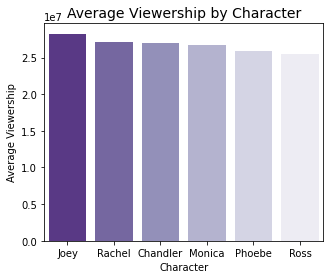

In [140]:
# bar plot for average viewership by character
plt.figure(figsize=(5,4))
sns.barplot(x=character_df2['characters'], y=character_df2['us_viewers'], palette='Purples_r')
plt.title('Average Viewership by Character', fontsize = 14)
plt.ylabel('Average Viewership')
plt.xlabel('Character');

Joey topped the average viewership analysis. Ross, who had the highest IMDB Rating has the least average viewership.

#### Which director captured a wider fan base?

In [55]:
# get the value count for each director
director_values = df['directed_by'].value_counts()
director_values

Gary Halvorson                      54
Kevin S. Bright                     53
Michael Lembeck                     24
James Burrows                       15
Gail Mancuso                        14
Peter Bonerz                        12
David Schwimmer                     10
Ben Weiss                           10
Shelley Jensen                       6
Robby Benson                         6
Terry Hughes                         5
Sheldon Epps                         3
Dana DeVally Piazza                  3
Pamela Fryman                        2
Roger Christiansen                   2
Steve Zuckerman                      2
Alan Myerson                         2
Thomas Schlamme                      2
Arlene Sanford                       1
Paul Lazarus                         1
Ellen Gittelsohn                     1
Andrew Tsao                          1
Sam Simon                            1
Kevin S. Bright & Gary Halvorson     1
Stephen Prime                        1
Mary Kay Place           

In [56]:
print(len(director_values))

29


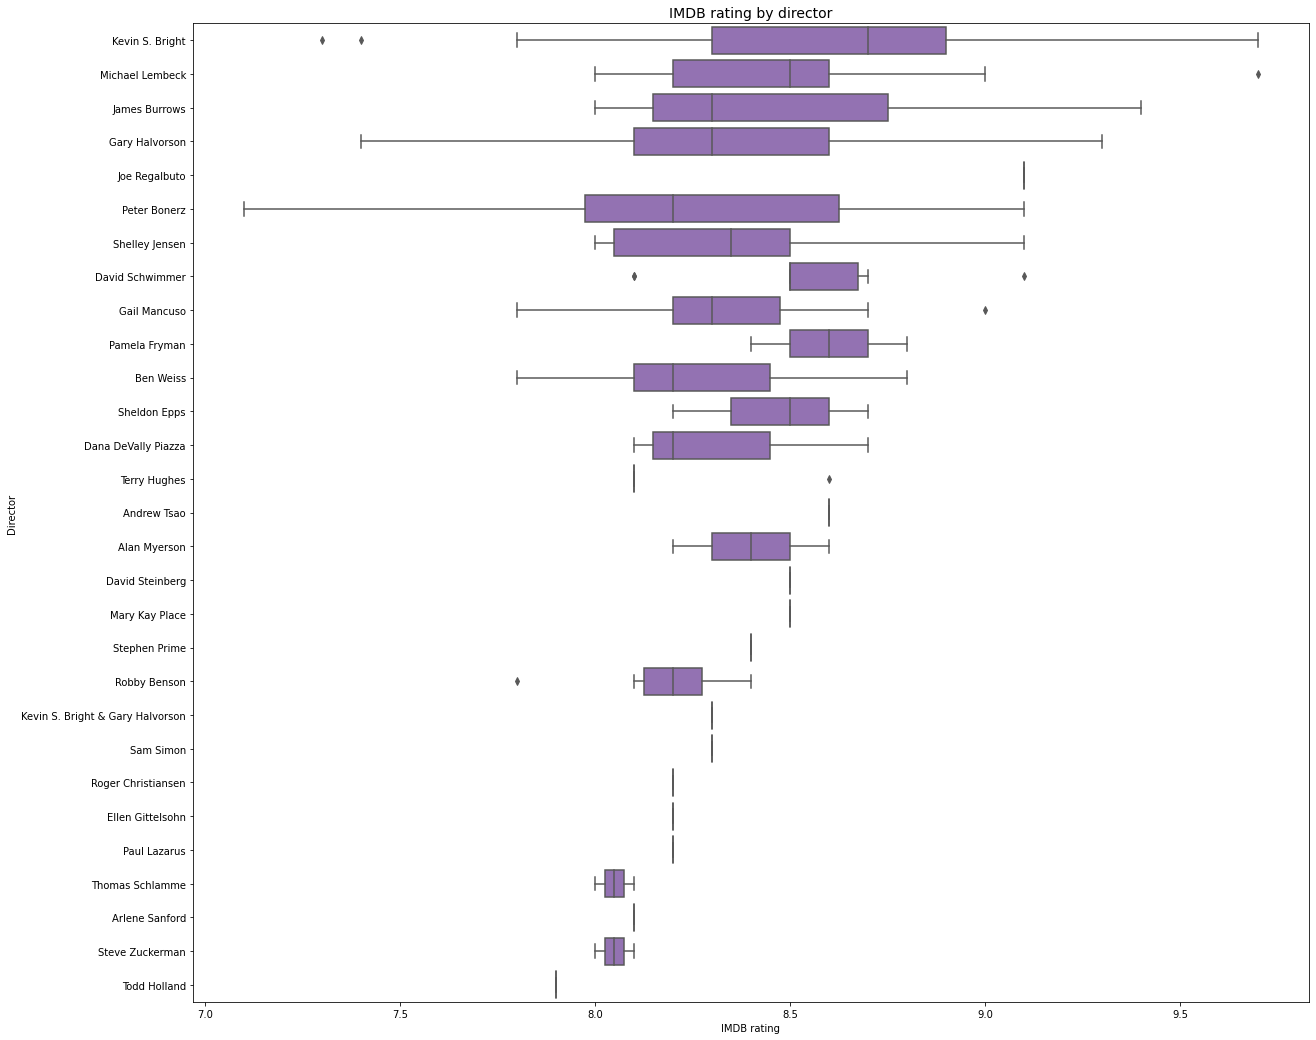

In [59]:
# box plot
plt.figure(figsize=(20,18))
base_color = sns.color_palette()[4]
sns.boxplot(data = df, x = 'imdb_rating', y = 'directed_by', color = base_color)
plt.title('IMDB rating by director', fontsize = 14)
plt.ylabel('Director')
plt.xlabel('IMDB rating');

In [60]:
df3 = df.drop(['episode_num_in_season','episode_num_overall','season'],axis = 1)
df3 = df3.groupby('directed_by').agg('mean')# group numerical variables by directors

# create df with 10 directors with highest average rating
df3 = df3.sort_values(by='imdb_rating', ascending=False)[:10]
df3.head()

,imdb_rating,us_viewers
directed_by,,
Joe Regalbuto,9.100000,2.702000e+07
Kevin S. Bright,8.624528,2.733358e+07
Pamela Fryman,8.600000,2.099500e+07
Andrew Tsao,8.600000,2.602000e+07
David Schwimmer,8.530000,2.443300e+07


In [61]:
x_vals = df3.index.to_series()#convert it to pandas series
y_vals = df3['imdb_rating']
y_vals

directed_by
Joe Regalbuto      9.100000
Kevin S. Bright    8.624528
Pamela Fryman      8.600000
Andrew Tsao        8.600000
David Schwimmer    8.530000
Mary Kay Place     8.500000
David Steinberg    8.500000
Michael Lembeck    8.487500
James Burrows      8.480000
Sheldon Epps       8.466667
Name: imdb_rating, dtype: float64

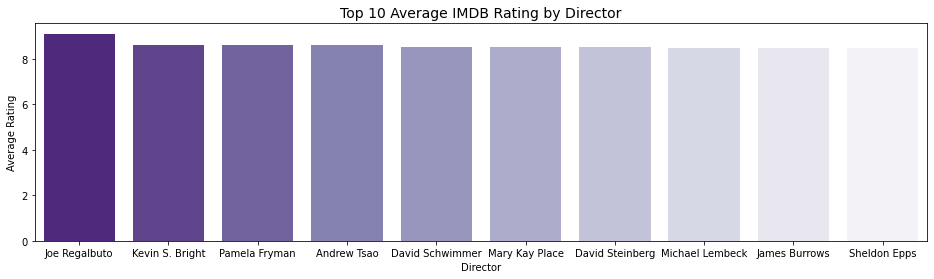

In [63]:
# bar plot for average rating by director
plt.figure(figsize=(16,4))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average IMDB Rating by Director', fontsize = 14)
plt.ylabel('Average Rating')
plt.xlabel('Director');

Joe Regalbuto has the highest average IMDB Rating of 9.1 and Sheldon Epps comes in the 10th position with average rating of 8.47.

In [114]:
# create df with 10 directors with highest average rviewership
df3 = df3.sort_values(by='us_viewers', ascending=False)[:10]
x_vals = df3.index.to_series()#convert it to pandas series
y_vals = df3['us_viewers']
y_vals

directed_by
Mary Kay Place     3.290000e+07
Michael Lembeck    2.958792e+07
Kevin S. Bright    2.733358e+07
Joe Regalbuto      2.702000e+07
Sheldon Epps       2.628000e+07
Andrew Tsao        2.602000e+07
James Burrows      2.477667e+07
David Schwimmer    2.443300e+07
David Steinberg    2.366000e+07
Pamela Fryman      2.099500e+07
Name: us_viewers, dtype: float64

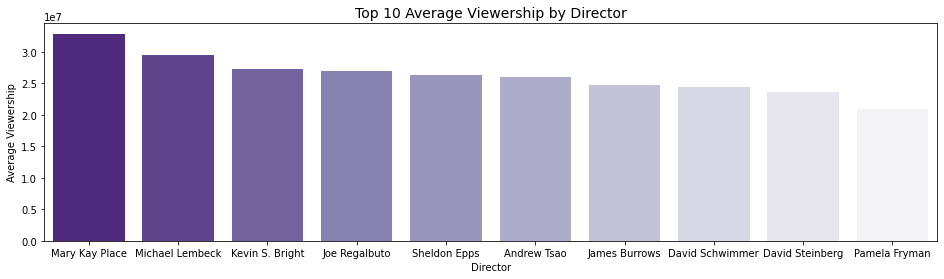

In [65]:
# bar plot for average viewership by director
plt.figure(figsize=(16,4))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average Viewership by Director', fontsize = 14)
plt.ylabel('Average Viewership')
plt.xlabel('Director');

Mary Kay Place comes in top with a highest viewership of 3.29e+07. Joe Regalbuto, who came first with highest average rating bagged the 4th highest average viewership.

#### Which writer contributed most to fan favourite episodes?

In [191]:
# get value count for each writer
writer_values = df['written_by'].value_counts()
writer_values

Andrew Reich & Ted Cohen                                                         12
Alexa Junge                                                                      11
David Crane & Marta Kauffman                                                     10
Doty Abrams                                                                       9
Marta Kauffman & David Crane                                                      8
                                                                                 ..
Story by: Sherry Bilsing & Ellen PlummerTeleplay by: Andrew Reich & Ted Cohen     1
Story by: Scott SilveriTeleplay by: Gregory S. Malins                             1
Robert Carlock & Dana Klein Borkow                                                1
Story by: Wil CalhounTeleplay by: David Crane & Marta Kauffman                    1
R. Lee Fleming Jr.                                                                1
Name: written_by, Length: 96, dtype: int64

In [192]:
df4 = df.groupby('written_by').agg('mean')# group numerical variables by writers

# create df with 10 writers with highest average rating
df4 = df4.sort_values(by='imdb_rating', ascending=False)[:10]
df4.head()

,imdb_rating,season,episode_num_in_season,episode_num_overall,us_viewers
written_by,,,,,
Story by: Jill Condon & Amy Toomin Teleplay by: Shana Goldberg-Meehan & Scott Silveri,9.2,4.0,24.0,97.0,31610000.0
Story by: Brian BoyleTeleplay by: Suzie Villandry,9.1,5.0,11.0,108.0,27020000.0
Story by: Zachary RosenblattTeleplay by: Adam Chase,9.1,6.0,17.0,138.0,22210000.0
Gregory S. Malins & Scott Silveri,9.1,5.0,24.0,121.0,25900000.0
Story by: Brian CaldirolaTeleplay by: Sherry Bilsing-Graham & Ellen Plummer,9.0,6.0,22.0,143.0,20010000.0


In [193]:
x_vals = df4.index.to_series()#convert it to pandas series
y_vals = df4['imdb_rating']
y_vals

written_by
Story by: Jill Condon & Amy Toomin Teleplay by: Shana Goldberg-Meehan & Scott Silveri    9.2000
Story by: Brian BoyleTeleplay by: Suzie Villandry                                        9.1000
Story by: Zachary RosenblattTeleplay by: Adam Chase                                      9.1000
Gregory S. Malins & Scott Silveri                                                        9.1000
Story by: Brian CaldirolaTeleplay by: Sherry Bilsing-Graham & Ellen Plummer              9.0000
Gregory S. Malins                                                                        8.9250
Robert Carlock & Dana Klein Borkow                                                       8.9000
Marta Kauffman & David Crane                                                             8.8375
Story by: Pang-Ni Landrum & Mark KunerthTeleplay by: Adam Chase                          8.8000
Brian Buckner                                                                            8.8000
Name: imdb_rating, dtype: flo

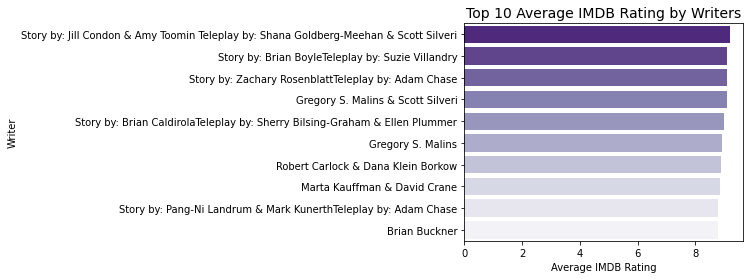

In [194]:
# bar plot for average rating by writer
plt.figure(figsize=(5,4))
sns.barplot(y=x_vals, x=y_vals, palette='Purples_r')
plt.title('Top 10 Average IMDB Rating by Writers', fontsize = 14)
plt.xlabel('Average IMDB Rating')
plt.ylabel('Writer');

As observed from above, the team of Jill Cordon, Amy Toomin, Shana Goldberg-Meehan and Scott Silveri has bagged the highest average IMDB rating.


In [195]:
# create df with 10 writers with highest average viewership
df4 = df4.sort_values(by='us_viewers', ascending=False)[:10]
df4.head()

,imdb_rating,season,episode_num_in_season,episode_num_overall,us_viewers
written_by,,,,,
Marta Kauffman & David Crane,8.8375,5.875,18.5,136.75,34130000.0
Story by: Jill Condon & Amy Toomin Teleplay by: Shana Goldberg-Meehan & Scott Silveri,9.2000,4.000,24.0,97.00,31610000.0
Story by: Brian BoyleTeleplay by: Suzie Villandry,9.1000,5.000,11.0,108.00,27020000.0
Gregory S. Malins & Scott Silveri,9.1000,5.000,24.0,121.00,25900000.0
Robert Carlock & Dana Klein Borkow,8.9000,10.000,12.0,230.00,25900000.0


In [196]:
x_vals = df4.index.to_series()#convert it to pandas series
y_vals = df4['us_viewers']
y_vals

written_by
Marta Kauffman & David Crane                                                             34130000.0
Story by: Jill Condon & Amy Toomin Teleplay by: Shana Goldberg-Meehan & Scott Silveri    31610000.0
Story by: Brian BoyleTeleplay by: Suzie Villandry                                        27020000.0
Gregory S. Malins & Scott Silveri                                                        25900000.0
Robert Carlock & Dana Klein Borkow                                                       25900000.0
Gregory S. Malins                                                                        24100000.0
Story by: Pang-Ni Landrum & Mark KunerthTeleplay by: Adam Chase                          23390000.0
Story by: Zachary RosenblattTeleplay by: Adam Chase                                      22210000.0
Brian Buckner                                                                            21870000.0
Story by: Brian CaldirolaTeleplay by: Sherry Bilsing-Graham & Ellen Plummer              

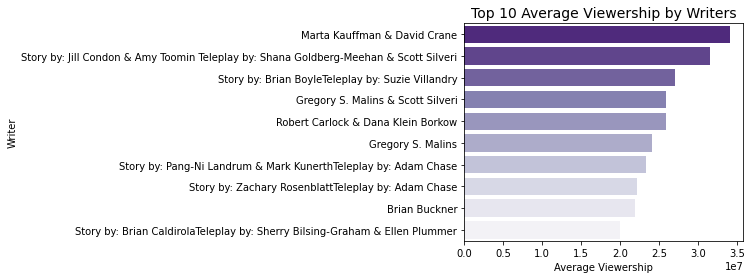

In [197]:
# bar plot for average viewership by writer
plt.figure(figsize=(5,4))
sns.barplot(y=x_vals, x=y_vals, palette='Purples_r')
plt.title('Top 10 Average Viewership by Writers', fontsize = 14)
plt.xlabel('Average Viewership')
plt.ylabel('Writer');

The very producers of the show: Marta Kauffman and David Crane has written the episodes with highest viewership. They are seconded by the team wth highest rating.

##### Let us explore if there's any relation between aired year and fan base. This is might be redundant because the seasons and released year are nearly same except a few variations.

In [120]:
# rename the column name of 'original_air_date' to a simpler name 'air_date'
df = df.rename(columns = {'original_air_date':'air_date'})
df['air_date']= pd.to_datetime(df['air_date']) # convert the column value into datetime object

In [121]:
# create a column 'air_year' and store the values of year from the air_date column
df['air_year'] = df.air_date.dt.year.astype('Int64')

In [122]:
# get value count for each aired year
year_values = df['air_year'].value_counts()
year_values

1996    25
2000    25
2001    25
1997    25
1999    24
1998    24
1995    23
2002    23
2003    22
2004    10
1994    10
Name: air_year, dtype: Int64

In [123]:
df5 = df.groupby('air_year').agg('mean')# group numerical variables by aired years

# create df with 10 aired year with highest average rating
df5 = df5.sort_values(by='imdb_rating', ascending=False)[:10]
df5.head()

,imdb_rating,imdb_rating_x,imdb_rating_y,season,episode_num_in_season,episode_num_overall,us_viewers
air_year,,,,,,,
2004,8.840000,8.840000,8.840000,10.000000,13.50,231.5,3.021300e+07
1998,8.533333,8.533333,8.533333,4.416667,12.50,95.5,2.493958e+07
1999,8.529167,8.529167,8.529167,5.416667,12.50,119.5,2.360250e+07
2001,8.520000,8.520000,8.520000,7.440000,12.44,169.0,2.358960e+07
1996,8.448000,8.448000,8.448000,2.400000,12.40,46.0,3.012680e+07


In [124]:
x_vals = df5.index.to_series()#convert it to pandas series
y_vals = df5['imdb_rating']
y_vals

air_year
2004    8.840000
1998    8.533333
1999    8.529167
2001    8.520000
1996    8.448000
2000    8.404000
1997    8.380000
1995    8.321739
2003    8.313636
2002    8.291304
Name: imdb_rating, dtype: float64

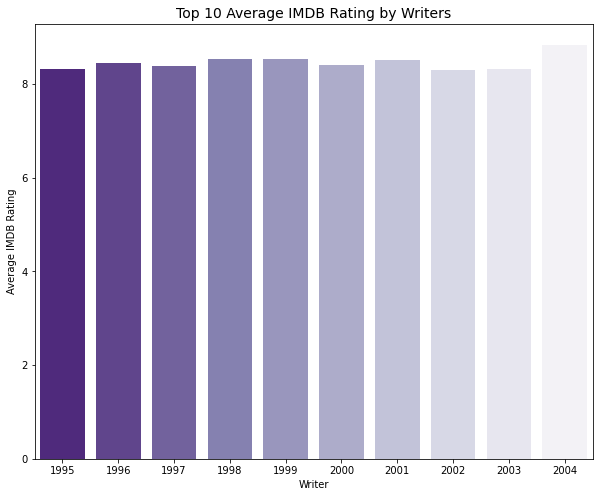

In [125]:
# bar plot for average rating by aired year
plt.figure(figsize=(10,8))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average IMDB Rating by Writers', fontsize = 14)
plt.ylabel('Average IMDB Rating')
plt.xlabel('Writer');

Episodes that were aired in 2004 has the highest IMDB Rating. It doesn't come as surprise becasue season 10 - the finale was aired on 2004. As season 10 had highest average rating, the year 2004 must bag the same. 

In [126]:
# create df with 10 aired year with highest average viewership
df5 = df5.sort_values(by='us_viewers', ascending=False)[:10]
df5.head()

,imdb_rating,imdb_rating_x,imdb_rating_y,season,episode_num_in_season,episode_num_overall,us_viewers
air_year,,,,,,,
2004,8.840000,8.840000,8.840000,10.000000,13.500000,231.5,3.021300e+07
1996,8.448000,8.448000,8.448000,2.400000,12.400000,46.0,3.012680e+07
1995,8.321739,8.321739,8.321739,1.391304,12.608696,22.0,2.867826e+07
2002,8.291304,8.291304,8.291304,8.434783,12.565217,193.0,2.686957e+07
1997,8.380000,8.380000,8.380000,3.400000,13.000000,71.0,2.575080e+07


In [127]:
x_vals = df5.index.to_series()#convert it to pandas series
y_vals = df5['us_viewers']
y_vals

air_year
2004    3.021300e+07
1996    3.012680e+07
1995    2.867826e+07
2002    2.686957e+07
1997    2.575080e+07
1998    2.493958e+07
1999    2.360250e+07
2001    2.358960e+07
2000    2.320920e+07
2003    2.160364e+07
Name: us_viewers, dtype: float64

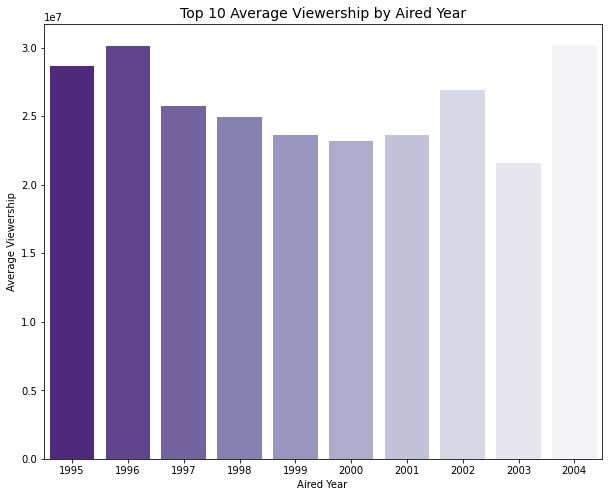

In [128]:
# bar plot for average viewership by aired year
plt.figure(figsize=(10,8))
sns.barplot(x=x_vals, y=y_vals, palette='Purples_r')
plt.title('Top 10 Average Viewership by Aired Year', fontsize = 14)
plt.ylabel('Average Viewership')
plt.xlabel('Aired Year ');

If we had expected to see the same trend as it were while analysing seasons, we would be dissappointed. Season 2 had the highest average viewership, seconded by season 10. But here 2004 gets the highest average viewership .

### Conclusions:

As it is pretty visible from all the analysis above, while choosing the fan-favourite contents there was always a trade off between IMDB Rating and the US Viewership. It's because by fundamental means both of them represent the viewers voice. If we let the data speak, the highest correlation was observed between the IMDB rating and the US Viewership. So, as I conclude I'll represent both the rating and viewership equally. The answers to the questions that were easked at the beginning are jotted down below:

1) Season 10 has the highest rating while Season 2 has the highest viewership

2) The character Rachel was given the highest importance in the show

3) Ross has the highest rating per episode and Joey had the highest viewership per episode

4) Joe Regalbuto directed episodes with highest average rating and Mary Kay Place directed episodes with highest average viewership.

5) The team of Jill Cordon, Amy Toomin, Shana Goldberg-Meehan and Scott Silveri wrote the episodes with highest average    rating and Marta Kauffman and           David Crane co-wrote the episodes with highest average viewership.

### Communicate your business insights

[This blog post](https://medium.com/@Janani2718/data-will-be-there-for-you-like-its-been-there-before-d8cb42c07cf4) is dedicated to convey the detailed results of the above analysis.